# K-Means

In [1]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from scipy import stats
import pickle

plt.rcParams['figure.figsize'] = [10,8]
#sns.set_style("whitegrid")
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

print('Libraries sudah siap')

Libraries sudah siap


In [2]:
# filter warnings because of scikit-learns love to warnings...
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv('DataSkripsiGempa.csv', sep = ';')

In [4]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-11-17T03:30:34.980Z,-3.5754,101.5892,59.84,5.00,mb,NaN,69.0,1.570,0.93,...,2022-01-22T20:51:57.040Z,"79 km WNW of Bengkulu, Indonesia",earthquake,4.2,6.5,0.072,61.0,reviewed,us,us
1,2021-11-03T00:50:35.771Z,0.9206,98.5198,64.77,5.10,mb,NaN,50.0,1.018,1.06,...,2022-01-14T17:58:55.040Z,"95 km SSW of Sibolga, Indonesia",earthquake,5.0,5.2,0.054,114.0,reviewed,us,us
2,2021-11-01T17:04:16.557Z,0.2081,96.7090,8.00,5.86,mb,NaN,17.0,1.391,1.00,...,2022-01-14T17:58:50.040Z,"253 km S of Sinabang, Indonesia",earthquake,7.2,1.7,0.047,44.0,reviewed,us,us
3,2021-10-15T23:17:27.891Z,-4.9203,102.9791,59.39,5.00,mb,NaN,50.0,0.556,0.77,...,2021-12-25T22:58:36.040Z,"103 km SSW of Pagar Alam, Indonesia",earthquake,6.7,5.9,0.066,73.0,reviewed,us,us
4,2021-10-08T10:04:53.362Z,4.4134,95.4330,61.14,5.20,mb,NaN,53.0,1.712,0.57,...,2021-12-18T19:58:38.040Z,"82 km WNW of Meulaboh, Indonesia",earthquake,7.4,5.7,0.047,153.0,reviewed,us,us


In [5]:
df.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1452,1973-03-29T06:20:37.600Z,-2.153,99.715,50.0,5.20,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:10.596Z,"150 km SSW of Padang, Indonesia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1453,1973-03-17T15:40:48.000Z,-5.193,103.235,68.0,5.70,mb,NaN,NaN,NaN,NaN,...,2022-04-27T18:57:25.911Z,"129 km S of Pagar Alam, Indonesia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1454,1973-02-27T14:49:36.900Z,-1.748,99.664,33.0,5.00,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:09.581Z,"117 km SW of Padang, Indonesia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1455,1973-02-26T21:57:30.000Z,-1.762,99.658,33.0,5.53,mb,5.66,NaN,NaN,NaN,...,2022-04-27T19:01:58.889Z,"118 km SW of Padang, Indonesia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1456,1973-02-25T10:31:39.500Z,-1.696,99.680,33.0,5.88,mb,6.03,NaN,NaN,NaN,...,2022-04-27T19:01:44.026Z,"111 km SW of Padang, Indonesia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1457 non-null   object 
 1   latitude         1457 non-null   float64
 2   longitude        1457 non-null   float64
 3   depth            1457 non-null   float64
 4   mag              1457 non-null   float64
 5   magType          1457 non-null   object 
 6   nst              438 non-null    float64
 7   gap              874 non-null    float64
 8   dmin             200 non-null    float64
 9   rms              1290 non-null   float64
 10  net              1457 non-null   object 
 11  id               1457 non-null   object 
 12  updated          1457 non-null   object 
 13  place            1457 non-null   object 
 14  type             1457 non-null   object 
 15  horizontalError  174 non-null    float64
 16  depthError       451 non-null    float64
 17  magError      

In [7]:
df["time"]= pd.to_datetime(df["time"], errors='coerce')

In [8]:
# only keeping the columns we require
df = df[['latitude','longitude','mag','depth','place']]

In [9]:
df.describe()

,latitude,longitude,mag,depth
count,1457.000000,1457.000000,1457.000000,1457.000000
mean,-1.490801,99.697339,5.341860,34.232629
std,3.237432,2.576762,0.417315,13.756558
min,-5.966000,95.098000,5.000000,3.900000
25%,-4.437000,97.198000,5.070000,26.100000
50%,-2.173000,99.935000,5.200000,33.000000
75%,1.425000,101.934000,5.460000,40.280000
max,5.418000,105.739000,8.920000,70.000000


In [10]:
df.describe(include='O')

,place
count,1457
unique,1174
top,"southern Sumatra, Indonesia"
freq,11


In [11]:
df[df['place'] == "southern Sumatra, Indonesia"]

,latitude,longitude,mag,depth,place
126,-5.2669,102.7235,5.50,22.95,"southern Sumatra, Indonesia"
388,-2.8290,101.0420,5.16,48.70,"southern Sumatra, Indonesia"
456,-3.7410,101.9860,5.07,44.20,"southern Sumatra, Indonesia"
857,-5.2140,102.7180,5.86,44.50,"southern Sumatra, Indonesia"
892,-4.8100,101.7620,5.20,33.00,"southern Sumatra, Indonesia"
897,-4.4610,102.0900,5.00,33.00,"southern Sumatra, Indonesia"
918,-4.3950,101.6820,5.00,33.00,"southern Sumatra, Indonesia"
973,-4.9690,102.2200,5.00,33.00,"southern Sumatra, Indonesia"
1026,-4.7960,101.9380,5.07,33.00,"southern Sumatra, Indonesia"
1254,-5.8770,104.0630,5.00,54.90,"southern Sumatra, Indonesia"


In [12]:
gempa = df[['mag','depth']]

In [13]:
gempa.head()

,mag,depth
0,5.00,59.84
1,5.10,64.77
2,5.86,8.00
3,5.00,59.39
4,5.20,61.14


In [14]:
gempa.shape

(1457, 2)

Text(0.5, 0, 'Kedalaman (km)')

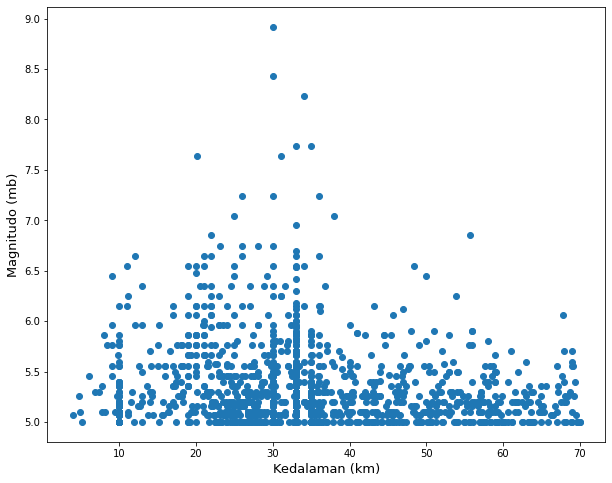

In [15]:
plt.scatter(gempa['depth'],gempa['mag'])
plt.ylabel('Magnitudo (mb)', size=13)
plt.xlabel('Kedalaman (km)', size=13)

### Scaler

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(gempa)
print(X_scaled)

[[-0.81946989  1.8621056 ]
 [-0.57976067  2.22060317]
 [ 1.24202936 -1.90757279]
 ...
 [-0.81946989 -0.08963375]
 [ 0.45098895 -0.08963375]
 [ 1.2899712  -0.08963375]]


In [17]:
scaled_df = pd.DataFrame(X_scaled, columns=gempa.columns)
scaled_df.head()

,mag,depth
0,-0.819470,1.862106
1,-0.579761,2.220603
2,1.242029,-1.907573
3,-0.819470,1.829383
4,-0.340051,1.956638


In [18]:
scaled_df.describe()

,mag,depth
count,1.457000e+03,1.457000e+03
mean,-4.221438e-17,-4.032274e-16
std,1.000343e+00,1.000343e+00
min,-8.194699e-01,-2.205715e+00
25%,-6.516734e-01,-5.913849e-01
50%,-3.400515e-01,-8.963375e-02
75%,2.831925e-01,4.397501e-01
max,8.577131e+00,2.600916e+00


In [19]:
scaler2 = MinMaxScaler()
X_scaled2 = scaler2.fit_transform(gempa)
print(X_scaled2)

[[0.         0.84629349]
 [0.0255102  0.92087746]
 [0.21938776 0.06202723]
 ...
 [0.         0.44024206]
 [0.13520408 0.44024206]
 [0.2244898  0.44024206]]


In [20]:
scaled_df2 = pd.DataFrame(X_scaled2, columns=gempa.columns)
scaled_df2.head()

,mag,depth
0,0.000000,0.846293
1,0.025510,0.920877
2,0.219388,0.062027
3,0.000000,0.839486
4,0.051020,0.865961


In [21]:
scaled_df2.head(10)

,mag,depth
0,0.000000,0.846293
1,0.025510,0.920877
2,0.219388,0.062027
3,0.000000,0.839486
4,0.051020,0.865961
5,0.040816,0.273828
6,0.051020,0.092284
7,0.168367,0.243570
8,0.102041,0.203480
9,0.025510,0.550681


In [22]:
scaled_df2.tail(7)

,mag,depth
1450,0.127551,0.712557
1451,0.229592,0.712557
1452,0.051020,0.697428
1453,0.178571,0.969743
1454,0.000000,0.440242
1455,0.135204,0.440242
1456,0.224490,0.440242


In [23]:
scaled_df2.describe()

,mag,depth
count,1457.000000,1457.000000
mean,0.087209,0.458890
std,0.106458,0.208117
min,0.000000,0.000000
25%,0.017857,0.335855
50%,0.051020,0.440242
75%,0.117347,0.550378
max,1.000000,1.000000


## Clustering

Menentukan jumlah cluster (K)

### Elbow Method

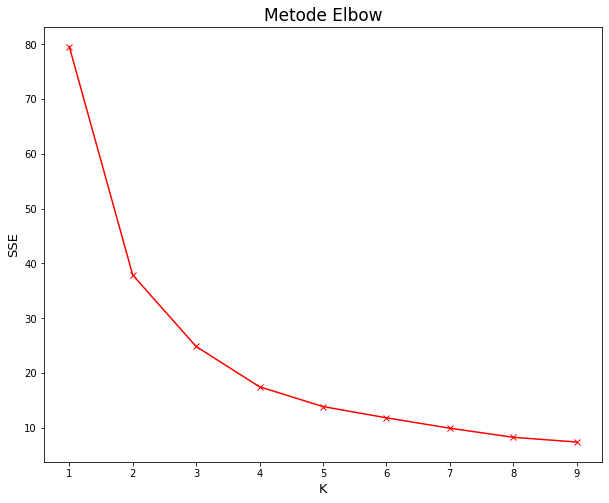

In [24]:
#Finding the optimal K using the elbow method
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_df2)    
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'rx-')

###plotting Elbow
plt.xlabel('K', size = 13)
plt.ylabel('SSE', size = 13)
plt.title('Metode Elbow', size = 17)
plt.show()

In [25]:
inertia = []

for i in range(1, 10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(scaled_df2)
    inertia.append(model.inertia_)
    
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 10)])
inertia_df

,Inertia
1,79.564785
2,37.888883
3,24.840546
4,17.489005
5,13.886969
6,11.820176
7,9.940087
8,8.269670
9,7.417002


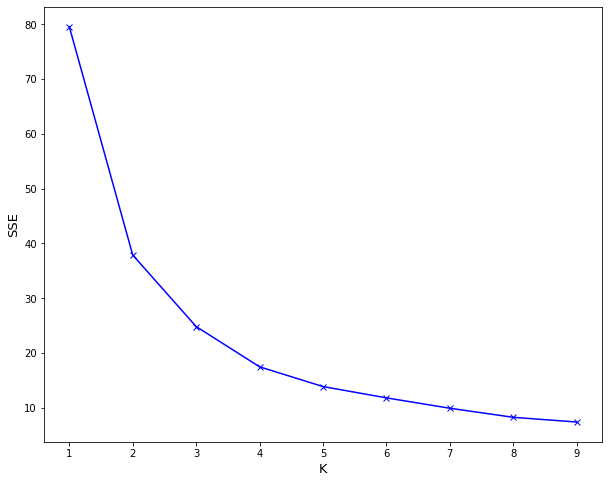

In [26]:
#Elbow method to minimize WSS (within-cluster Sum of Square)
Sum_of_squared_distances =[]
K = range(1,10)
for k in K:
    km =KMeans(n_clusters =k)
    km =km.fit(scaled_df2)
    Sum_of_squared_distances.append(km.inertia_)
###plotting Elbow
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K', size = 13)
plt.ylabel('SSE', size = 13)
#plt.title('Metode Elbow', size = 17)
plt.show()

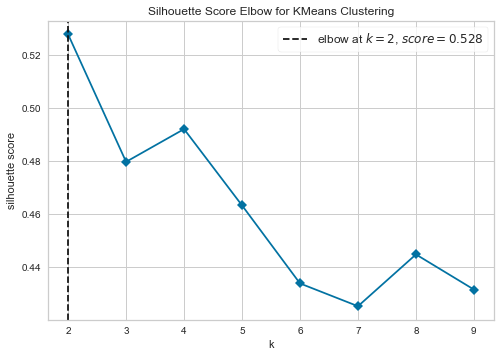

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [27]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

model = KMeans(random_state=10) 
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
visualizer.fit(scaled_df2)    
visualizer.poof()

For n_clusters = 2 The average silhouette_score is : 0.5278386571409014
For n_clusters = 3 The average silhouette_score is : 0.4798232232035974
For n_clusters = 4 The average silhouette_score is : 0.4921635811339771


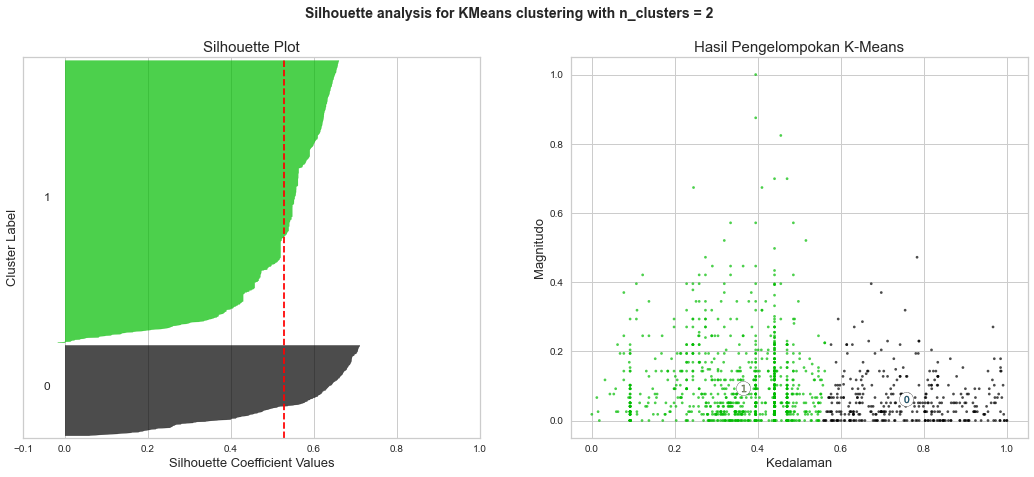

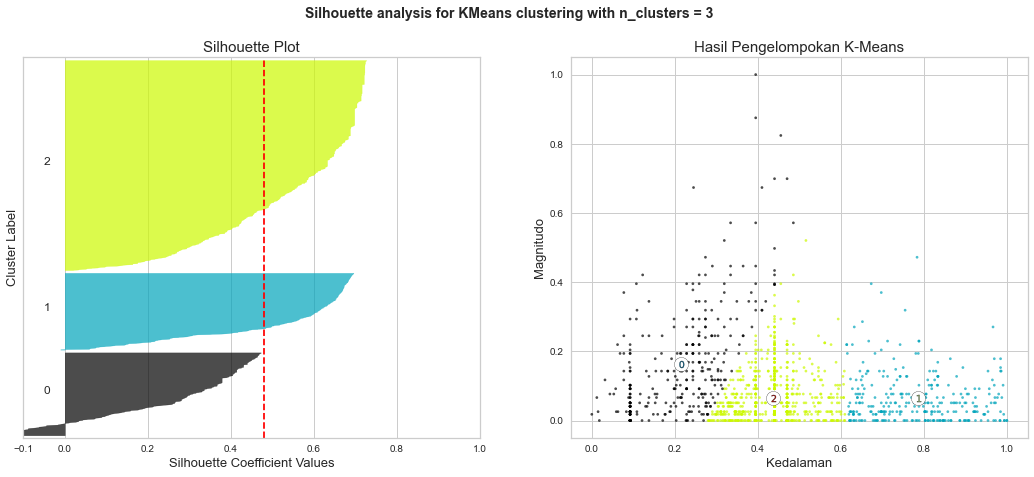

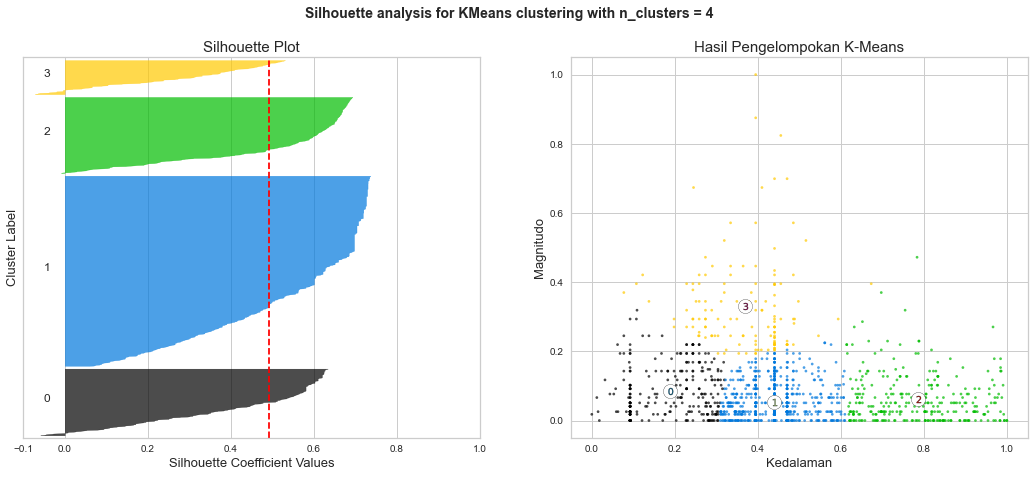

In [28]:
range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_df2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_df2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_df2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette Plot", size = 15)
    ax1.set_xlabel("Silhouette Coefficient Values", size = 13)
    ax1.set_ylabel("Cluster Label", size = 13)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_scaled2[:, 1], X_scaled2[:, 0], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 1],
        centers[:, 0],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[1], c[0], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Hasil Pengelompokan K-Means", size = 15)
    ax2.set_xlabel("Kedalaman", size = 13)
    ax2.set_ylabel("Magnitudo", size = 13)

    plt.suptitle(
        "Silhouette analysis for KMeans clustering with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

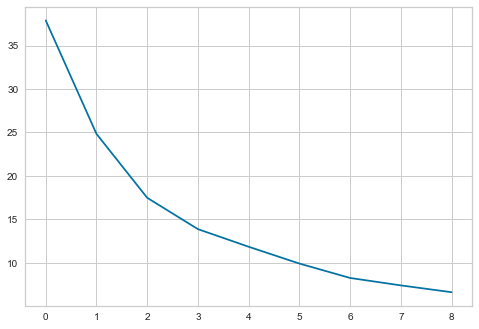

In [29]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df2)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [30]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    
    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df2)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(scaled_df2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5278386571409014
For n_clusters=3, the silhouette score is 0.4798232232035974
For n_clusters=4, the silhouette score is 0.4921635811339771
For n_clusters=5, the silhouette score is 0.4633936388566285
For n_clusters=6, the silhouette score is 0.4254976993749914
For n_clusters=7, the silhouette score is 0.4260665119924446
For n_clusters=8, the silhouette score is 0.44554493426006964
For n_clusters=9, the silhouette score is 0.4331172903018031
For n_clusters=10, the silhouette score is 0.4298421601469557


In [31]:
inertia_list = []
for num_clusters in range(1, 10):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(scaled_df2)
    inertia_list.append(kmeans_model.inertia_)

Text(0, 0.5, 'SSE')

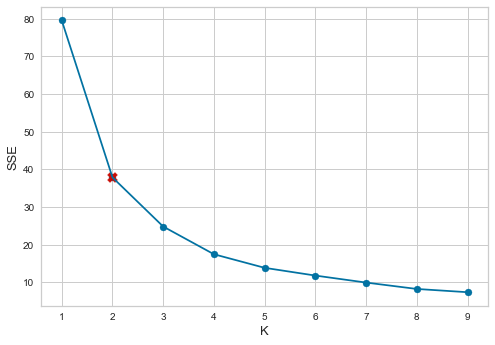

In [32]:
# plot the inertia curve
plt.plot(range(1,10),inertia_list)
plt.scatter(range(1,10),inertia_list)
plt.scatter(2, inertia_list[1], marker="X", s=100, c="r")
plt.xlabel("K", size=13)
plt.ylabel("SSE", size=13)
#plt.title("Metode Elbow", size=15)

In [33]:
inertia = []

for i in range(1, 10):
    model = KMeans(n_clusters=i, random_state=10)
    model.fit(scaled_df2)
    inertia.append(model.inertia_)
    
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 10)])
inertia_df

,Inertia
1,79.564785
2,37.888883
3,24.840546
4,17.489005
5,13.883051
6,11.823589
7,9.966534
8,8.272171
9,7.409513


Hitung centroid baru

In [34]:
kedalaman = scaled_df2['depth']
ked_awal = kedalaman[0:5,]
ked_awal

0    0.846293
1    0.920877
2    0.062027
3    0.839486
4    0.865961
Name: depth, dtype: float64

In [35]:
ked_sisa = kedalaman[5:1457,]
ked_sisa

5       0.273828
6       0.092284
7       0.243570
8       0.203480
9       0.550681
          ...   
1452    0.697428
1453    0.969743
1454    0.440242
1455    0.440242
1456    0.440242
Name: depth, Length: 1452, dtype: float64

In [36]:
print('mean ked_awal:',ked_awal.mean())
print('mean ked_sisa:', ked_sisa.mean())

mean ked_awal: 0.7069288956127081
mean ked_sisa: 0.4580358668517067


In [37]:
magnitud = scaled_df2['mag']
mag_awal = magnitud[0:5,]
mag_awal

0    0.000000
1    0.025510
2    0.219388
3    0.000000
4    0.051020
Name: mag, dtype: float64

In [38]:
mag_sisa = magnitud[5:1457,]
mag_sisa

5       0.040816
6       0.051020
7       0.168367
8       0.102041
9       0.025510
          ...   
1452    0.051020
1453    0.178571
1454    0.000000
1455    0.135204
1456    0.224490
Name: mag, Length: 1452, dtype: float64

In [39]:
print('mean mag_awal:',mag_awal.mean())
print('mean mag_sisa:', mag_sisa.mean())

mean mag_awal: 0.0591836734693878
mean mag_sisa: 0.08730568673750469


### K-Means

coba_kmeans1

In [40]:
from sklearn.cluster import kmeans_plusplus
centers, indices = kmeans_plusplus(X_scaled2, n_clusters=2, random_state=10)
centers

array([[0.        , 0.63691377],
       [0.11734694, 0.47049924]])

In [41]:
indices

array([1289,  541])

In [42]:
kmeans = KMeans(init = "k-means++",n_clusters = 2,n_init = 10,max_iter = 100,random_state = 10)

In [43]:
kmeans.fit(scaled_df2)

KMeans(max_iter=100, n_clusters=2, random_state=10)

In [44]:
kmeans.inertia_

37.888882666724896

In [45]:
kmeans.n_iter_

3

In [46]:
kmeans.labels_[:5]

array([0, 0, 1, 0, 0])

In [47]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 100,
    "random_state": 10,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df2)
    sse.append(kmeans.inertia_)

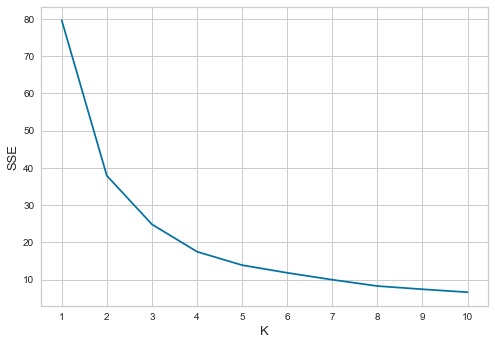

In [48]:
#plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("K", size = 13)
plt.ylabel("SSE", size = 13)
plt.show()

Text(0, 0.5, 'SSE')

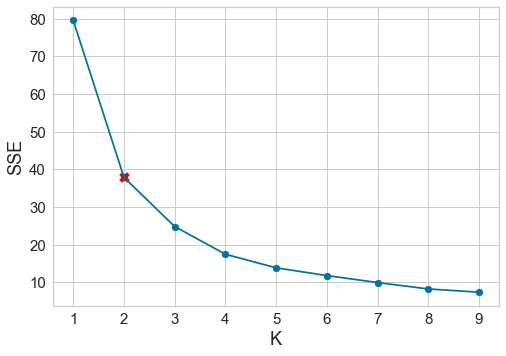

In [130]:
# plot the inertia curve
plt.plot(range(1,10),inertia_list)
plt.scatter(range(1,10),inertia_list)
plt.scatter(2, inertia_list[1], marker="X", s=100, c="r")
plt.xlabel("K", size=18)
plt.ylabel("SSE", size=18)
#plt.title("Metode Elbow", size=15)

In [128]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [50]:
from sklearn.metrics import silhouette_score
k = [2, 3, 4, 5, 6, 7, 8, 9]
score=[]
for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster).fit(scaled_df2)
    silhouette_avg = silhouette_score(scaled_df2,kmeans.labels_)
    score.append(silhouette_score(scaled_df2,kmeans.labels_))
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 2 Clusters: 0.5278
Silhouette Score for 3 Clusters: 0.4798
Silhouette Score for 4 Clusters: 0.4922
Silhouette Score for 5 Clusters: 0.4636
Silhouette Score for 6 Clusters: 0.4332
Silhouette Score for 7 Clusters: 0.4315
Silhouette Score for 8 Clusters: 0.4458
Silhouette Score for 9 Clusters: 0.4310


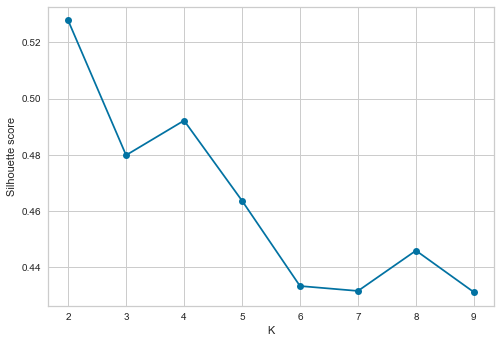

In [51]:
plt.plot(k, score, 'o-')
#plt.title('Metode Silhouette', size = 17)
plt.xlabel("K")
plt.ylabel("Silhouette score")
plt.show()

In [52]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_df2)

KMeans(n_clusters=2)

In [53]:
kmeans_silhouette = silhouette_score(
    scaled_df2, kmeans.labels_
    ).round(2)

In [54]:
kmeans_silhouette

0.53

In [55]:
kmeans.cluster_centers_

array([[0.09513942, 0.36340526],
       [0.0625    , 0.75640316]])

In [56]:
pred = kmeans.predict(scaled_df2)

In [57]:
result = pd.DataFrame(gempa)
result['k-means'] = pred
result['k-means'].value_counts()

0    1103
1     354
Name: k-means, dtype: int64

In [58]:
result

,mag,depth,k-means
0,5.00,59.84,1
1,5.10,64.77,1
2,5.86,8.00,0
3,5.00,59.39,1
4,5.20,61.14,1
...,...,...,...
1452,5.20,50.00,1
1453,5.70,68.00,1
1454,5.00,33.00,0
1455,5.53,33.00,0


In [59]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = ["mag","depth"])
cluster_centers

,mag,depth
0,0.095139,0.363405
1,0.062500,0.756403


In [60]:
# Invers data yang telah distandarisasi untuk lebih memahami karaktersitik klaster
cluster_centers_inversed = scaler.inverse_transform(cluster_centers)
cluster_centers_inversed = pd.DataFrame(data = cluster_centers_inversed, columns = ["mag","depth"])
cluster_centers_inversed

,mag,depth
0,5.381549,39.230118
1,5.367933,44.634561


In [61]:
C1 = result[result["k-means"] == 0]
C2 = result[result["k-means"] == 1]

In [62]:
C1[["mag","depth"]].describe()

,mag,depth
count,1103.000000,1103.000000
mean,5.372947,27.921088
std,0.449094,8.044933
min,5.000000,3.900000
25%,5.070000,23.500000
50%,5.200000,30.000000
75%,5.560000,33.000000
max,8.920000,41.000000


In [63]:
C2[["mag", "depth"]].describe()

,mag,depth
count,354.00000,354.000000
mean,5.24500,53.898249
std,0.27616,8.136893
min,5.00000,40.800000
25%,5.07000,46.600000
50%,5.16000,53.250000
75%,5.36000,59.565000
max,6.85000,70.000000


In [64]:
#X = gempa[["mag","depth"]]

In [65]:
#X['cluster'] = kmeans.fit_predict(scaled_df2)

### Visualisasi Cluster

In [66]:
gabung = pd.read_csv('DataGabung.csv', sep=';')

In [67]:
gabung.head()

,latitude,longitude,mag,depth,place,k-means
0,-3.5754,101.5892,5.00,59.84,"79 km WNW of Bengkulu, Indonesia",1
1,0.9206,98.5198,5.10,64.77,"95 km SSW of Sibolga, Indonesia",1
2,0.2081,96.7090,5.86,8.00,"253 km S of Sinabang, Indonesia",0
3,-4.9203,102.9791,5.00,59.39,"103 km SSW of Pagar Alam, Indonesia",1
4,4.4134,95.4330,5.20,61.14,"82 km WNW of Meulaboh, Indonesia",1


In [68]:
gabung.shape

(1457, 6)

In [69]:
gabung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   1457 non-null   float64
 1   longitude  1457 non-null   float64
 2   mag        1457 non-null   float64
 3   depth      1457 non-null   float64
 4   place      1457 non-null   object 
 5   k-means    1457 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 68.4+ KB


In [70]:
gabung = gabung.rename(columns = {'k-means':'cluster'})

In [71]:
import folium # plotting library
from folium import plugins

In [72]:
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('Reds')

In [73]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.cm import rainbow

In [74]:
import folium
from folium.plugins import MarkerCluster

In [75]:
gabung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   1457 non-null   float64
 1   longitude  1457 non-null   float64
 2   mag        1457 non-null   float64
 3   depth      1457 non-null   float64
 4   place      1457 non-null   object 
 5   cluster    1457 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 68.4+ KB


In [76]:
gabung[['cluster']] = gabung[['cluster']].astype(int)

In [77]:
gabung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   1457 non-null   float64
 1   longitude  1457 non-null   float64
 2   mag        1457 non-null   float64
 3   depth      1457 non-null   float64
 4   place      1457 non-null   object 
 5   cluster    1457 non-null   int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 62.7+ KB


In [78]:
gabung2 = gabung[['latitude','longitude','place','cluster']]

In [79]:
#gabung3.to_csv(r'C:\Users\Hp\FoliumMap.csv', index = False, header=True)

In [80]:
gabung2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   1457 non-null   float64
 1   longitude  1457 non-null   float64
 2   place      1457 non-null   object 
 3   cluster    1457 non-null   int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 40.0+ KB


In [81]:
gabung3 = gabung.copy()

In [82]:
gabung3['cluster'] = gabung3['cluster'].replace(to_replace=0, value = 'a')
gabung3['cluster'] = gabung3['cluster'].replace(to_replace=1, value = 'b')

In [83]:
gabung3['cluster'] = gabung3['cluster'].replace(to_replace='a', value = 1)
gabung3['cluster'] = gabung3['cluster'].replace(to_replace='b', value = 2)

In [84]:
gabung3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   1457 non-null   float64
 1   longitude  1457 non-null   float64
 2   mag        1457 non-null   float64
 3   depth      1457 non-null   float64
 4   place      1457 non-null   object 
 5   cluster    1457 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 68.4+ KB


In [85]:
gabung3.head()

,latitude,longitude,mag,depth,place,cluster
0,-3.5754,101.5892,5.00,59.84,"79 km WNW of Bengkulu, Indonesia",2
1,0.9206,98.5198,5.10,64.77,"95 km SSW of Sibolga, Indonesia",2
2,0.2081,96.7090,5.86,8.00,"253 km S of Sinabang, Indonesia",1
3,-4.9203,102.9791,5.00,59.39,"103 km SSW of Pagar Alam, Indonesia",2
4,4.4134,95.4330,5.20,61.14,"82 km WNW of Meulaboh, Indonesia",2


In [86]:
data = np.array(gabung3)

In [87]:
data

array([[-3.5754, 101.5892, 5.0, 59.84,
        '79 km WNW of Bengkulu, Indonesia', 2],
       [0.9206, 98.5198, 5.1, 64.77, '95 km SSW of Sibolga, Indonesia',
        2],
       [0.2081, 96.709, 5.86, 8.0, '253 km S of Sinabang, Indonesia', 1],
       ...,
       [-1.748, 99.664, 5.0, 33.0, '117 km SW of Padang, Indonesia', 1],
       [-1.762, 99.658, 5.53, 33.0, '118 km SW of Padang, Indonesia', 1],
       [-1.696, 99.68, 5.88, 33.0, '111 km SW of Padang, Indonesia', 1]],
      dtype=object)

In [88]:
# point_layer name list
all_gp = []
for x in range(len(data)):
    pg = data[x][5]
    all_gp.append(pg)

In [89]:
# Create point_layer object
unique_gp = list(set(all_gp))
vlist = []
for i,k in enumerate(unique_gp):
    locals()[f'point_layer{i}'] = folium.FeatureGroup(name=k)
    vlist.append(locals()[f'point_layer{i}'])

In [90]:
# Creating list for point_layer
pl_group = []
for n in all_gp:
    for v in vlist: 
        if n == vars(v)['layer_name']:
            pl_group.append(v)

In [91]:
map_clust = folium.Map(location=[gabung3.latitude.mean(), gabung3.longitude.mean()], tiles='OpenStreetMap',zoom_start=9)

# get a colour
def color_producer(cluster):
    if cluster == 1:
        col = 'red'
    else:
        col = 'yellow'
    return col

# point_layer name list
all_gp = []
for x in range(len(data)):
    pg = data[x][5]
    all_gp.append(pg)

# Create point_layer object
unique_gp = list(set(all_gp))
vlist = []
for i,k in enumerate(unique_gp):
    locals()[f'point_layer{i}'] = folium.FeatureGroup(name=k)
    vlist.append(locals()[f'point_layer{i}'])
    
# Creating list for point_layer
pl_group = []
for n in all_gp:
    for v in vlist: 
        if n == vars(v)['layer_name']:
            pl_group.append(v)

for (lat, lng, place, cluster, pg) in zip(gabung3['latitude'],gabung3['longitude'],gabung3['place'],gabung3['cluster'], pl_group):
    folium.vector_layers.CircleMarker(
        [lat, lng], radius=3,
        popup=str(place)+ '- Cluster ' + str(cluster),
        tooltip = str(place)+ '- Cluster ' + str(cluster),
        color = color_producer(cluster),
        fill=True,
        fill_color=color_producer(cluster),
        fill_opacity=0.9).add_to(pg)
    pg.add_to(map_clust)
    
map_clust.add_child(folium.LayerControl(collapsed=False)) 

map_clust

In [92]:
gabung3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   1457 non-null   float64
 1   longitude  1457 non-null   float64
 2   mag        1457 non-null   float64
 3   depth      1457 non-null   float64
 4   place      1457 non-null   object 
 5   cluster    1457 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 68.4+ KB


In [93]:
C1 = gabung3[gabung3["cluster"] == 1]
C2 = gabung3[gabung3["cluster"] == 2]

In [94]:
C1[["mag","depth"]].describe()

,mag,depth
count,1103.000000,1103.000000
mean,5.372947,27.921088
std,0.449094,8.044933
min,5.000000,3.900000
25%,5.070000,23.500000
50%,5.200000,30.000000
75%,5.560000,33.000000
max,8.920000,41.000000


In [95]:
C2[["mag", "depth"]].describe()

,mag,depth
count,354.00000,354.000000
mean,5.24500,53.898249
std,0.27616,8.136893
min,5.00000,40.800000
25%,5.07000,46.600000
50%,5.16000,53.250000
75%,5.36000,59.565000
max,6.85000,70.000000


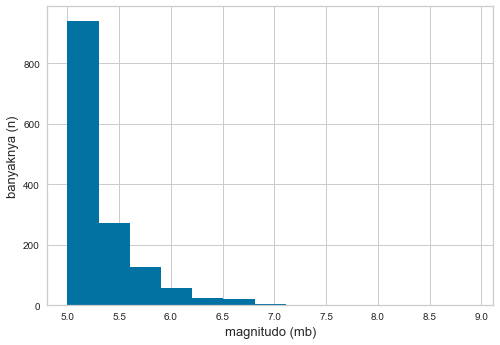

In [96]:
plt.hist(gabung['mag'], bins=13)
#plt.title('Magnitudo')
plt.xlabel("magnitudo (mb)", size=13)
plt.ylabel("banyaknya (n)", size=13)
plt.show()

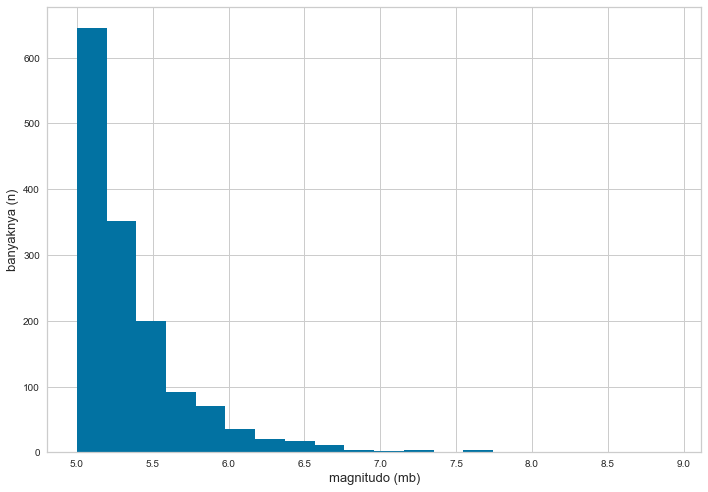

In [97]:
fig, axs = plt.subplots(1,1,
                        figsize = (10,7),
                        tight_layout = True)
axs.hist(gabung['mag'], bins = 20)
plt.xlabel("magnitudo (mb)", size=13)
plt.ylabel("banyaknya (n)", size=13)
plt.show()

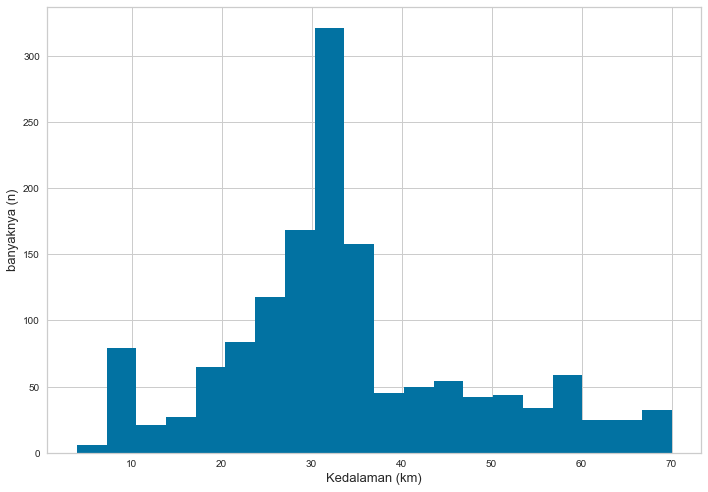

In [98]:
fig, axs = plt.subplots(1,1,
                        figsize = (10,7),
                        tight_layout = True)
axs.hist(gabung['depth'], bins = 20)
plt.xlabel("Kedalaman (km)", size=13)
plt.ylabel("banyaknya (n)", size=13)
plt.show()

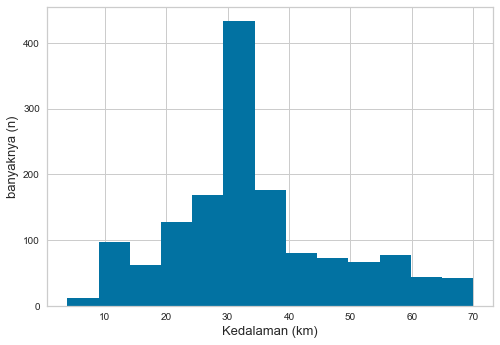

In [99]:
plt.hist(gabung['depth'], bins=13)
#plt.title('Kedalaman')
plt.xlabel("Kedalaman (km)", size=13)
plt.ylabel("banyaknya (n)", size=13)
plt.show()

In [100]:
gabung['mag'].describe()

count    1457.000000
mean        5.341860
std         0.417315
min         5.000000
25%         5.070000
50%         5.200000
75%         5.460000
max         8.920000
Name: mag, dtype: float64

In [101]:
gabung3.head(10)

,latitude,longitude,mag,depth,place,cluster
0,-3.5754,101.5892,5.00,59.84,"79 km WNW of Bengkulu, Indonesia",2
1,0.9206,98.5198,5.10,64.77,"95 km SSW of Sibolga, Indonesia",2
2,0.2081,96.7090,5.86,8.00,"253 km S of Sinabang, Indonesia",1
3,-4.9203,102.9791,5.00,59.39,"103 km SSW of Pagar Alam, Indonesia",2
4,4.4134,95.4330,5.20,61.14,"82 km WNW of Meulaboh, Indonesia",2
5,2.9309,95.3897,5.16,22.00,"120 km WNW of Sinabang, Indonesia",1
6,-3.1615,100.4063,5.20,10.00,"164 km SW of Sungai Penuh, Indonesia",1
7,-3.2114,100.1976,5.66,20.00,"184 km SW of Sungai Penuh, Indonesia",1
8,1.8228,96.9785,5.40,17.35,"98 km SE of Sinabang, Indonesia",1
9,-2.8938,101.0849,5.10,40.30,"98 km SSW of Sungai Penuh, Indonesia",1


In [102]:
gabung3.tail(7)

,latitude,longitude,mag,depth,place,cluster
1450,-3.243,101.240,5.50,51.0,"129 km WNW of Bengkulu, Indonesia",2
1451,-1.468,99.851,5.90,51.0,"80 km SW of Padang, Indonesia",2
1452,-2.153,99.715,5.20,50.0,"150 km SSW of Padang, Indonesia",2
1453,-5.193,103.235,5.70,68.0,"129 km S of Pagar Alam, Indonesia",2
1454,-1.748,99.664,5.00,33.0,"117 km SW of Padang, Indonesia",1
1455,-1.762,99.658,5.53,33.0,"118 km SW of Padang, Indonesia",1
1456,-1.696,99.680,5.88,33.0,"111 km SW of Padang, Indonesia",1


In [103]:
#gabung3.to_csv(r'C:\Users\Hp\DataKmeansKluster.csv', index = False, header=True)

### Visualisasi

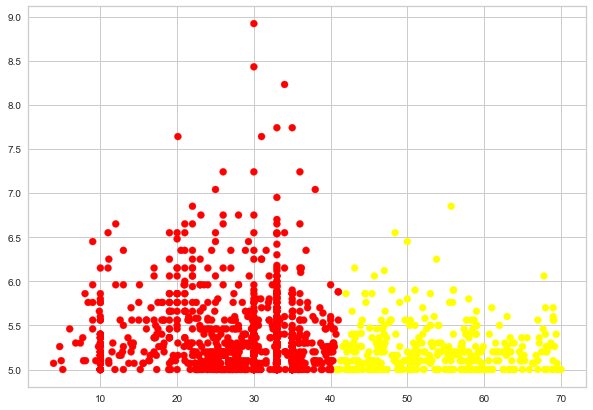

In [104]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Plot the results
colors = ['red', 'yellow']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
x = data[:,3]
y = data[:,2]


ax.scatter(x, y, c=gabung3.cluster, cmap=ListedColormap(colors))
#ax.title.set_text('K-Means Clustering')

In [133]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Text(0, 0.5, 'Magnitudo (mb)')

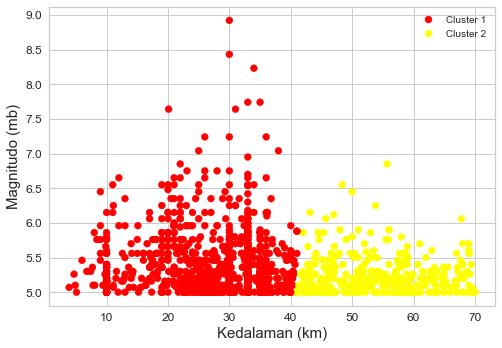

In [135]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x = data[:,3]
y = data[:,2]

classes = ['Cluster 1', 'Cluster 2']
values = gabung3.cluster
colors = ListedColormap(['red','yellow'])
scatter = plt.scatter(x, y, c=values, cmap=colors)
#plt.title('K-Means Clustering')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel('Kedalaman (km)', size = 15)
plt.ylabel('Magnitudo (mb)', size = 15)

In [106]:
X = gabung3[["mag","depth","cluster"]]

In [107]:
X

,mag,depth,cluster
0,5.00,59.84,2
1,5.10,64.77,2
2,5.86,8.00,1
3,5.00,59.39,2
4,5.20,61.14,2
...,...,...,...
1452,5.20,50.00,2
1453,5.70,68.00,2
1454,5.00,33.00,1
1455,5.53,33.00,1


In [108]:
cluster_centers_inversed.iloc[:,0]

0    5.381549
1    5.367933
Name: mag, dtype: float64

In [109]:
cluster_centers_inversed.iloc[:,1]

0    39.230118
1    44.634561
Name: depth, dtype: float64

In [110]:
x

array([59.84, 64.77, 8.0, ..., 33.0, 33.0, 33.0], dtype=object)

In [111]:
y

array([5.0, 5.1, 5.86, ..., 5.0, 5.53, 5.88], dtype=object)

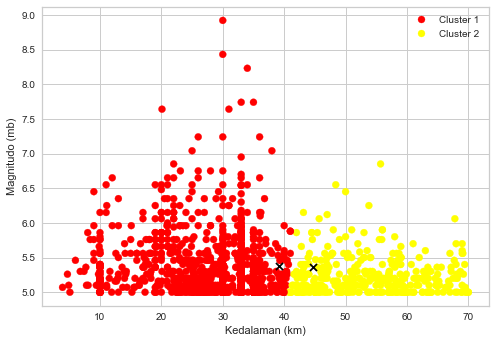

In [112]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x = data[:,3]
y = data[:,2]

classes = ['Cluster 1', 'Cluster 2']
values = gabung3.cluster
colors = ListedColormap(['red','yellow'])
scatter = plt.scatter(x, y, c=values, cmap=colors)

#plt.title('K-Means Clustering')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel('Kedalaman (km)')
plt.ylabel('Magnitudo (mb)')

#centroid
cent = plt.scatter(cluster_centers_inversed.iloc[:,1], cluster_centers_inversed.iloc[:,0], s=50, c = "black", marker = "x", label = "Centroid")

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


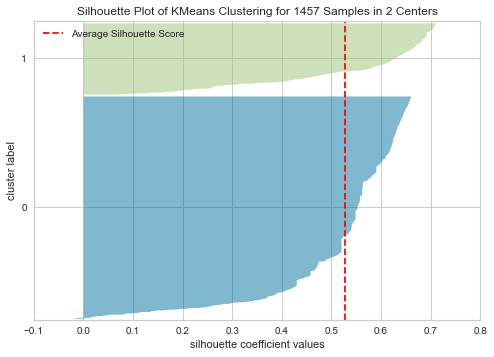

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1457 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [113]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(scaled_df2)        # Fit the data to the visualizer
visualizer.show() 

In [114]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

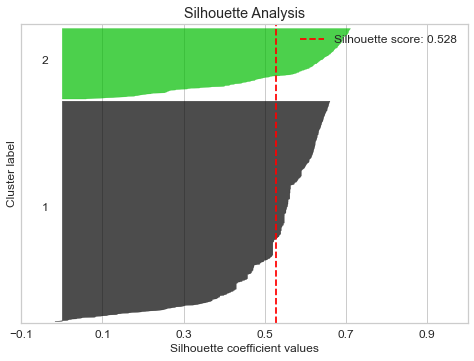

In [136]:
import scikitplot as skplt

skplt.metrics.plot_silhouette(X_scaled2, gabung3.cluster)

<AxesSubplot:title={'center':'Elbow Plot'}, xlabel='Number of clusters', ylabel='Sum of Squared Errors'>

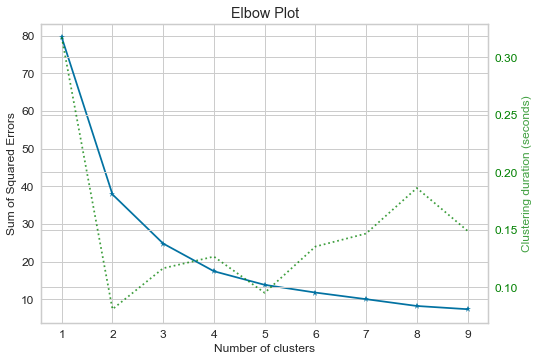

In [116]:
skplt.cluster.plot_elbow_curve(kmeans, X_scaled2, cluster_ranges=range(1, 10))

In [117]:
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

In [118]:
## add to df
X['cen_x'] = X.cluster.map({0:cen_x[0], 1:cen_x[1]})
X['cen_y'] = X.cluster.map({0:cen_y[0], 1:cen_y[1]})

# define and map colors
colors = ['#DF2020', '#81DF20']
X['c'] = X.cluster.map({0:colors[0], 1:colors[1]})

C:\Users\Hp\AppData\Local\Temp/ipykernel_26328/1032859235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cen_x'] = X.cluster.map({0:cen_x[0], 1:cen_x[1]})
C:\Users\Hp\AppData\Local\Temp/ipykernel_26328/1032859235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cen_y'] = X.cluster.map({0:cen_y[0], 1:cen_y[1]})


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0           NaN
1           NaN
2       #81DF20
3           NaN
4           NaN
         ...   
1452        NaN
1453        NaN
1454    #81DF20
1455    #81DF20
1456    #81DF20
Name: c, Length: 1457, dtype: object

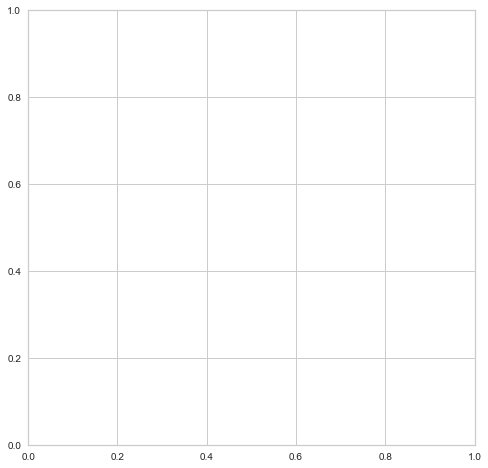

In [119]:
from scipy.spatial import ConvexHull
import numpy as np

fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(X.mag, X.depth, c=X.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# draw enclosure
for i in X.cluster.unique():
    points = X[X.cluster == i][['mag', 'depth']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    
plt.xlim(0,200)
plt.ylim(0,200)

In [ ]:
# Visualisasi hasil clusters
plt.scatter(gempa[pred == 0, 0], gempa[pred == 1, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(gempa[pred == 0, 1], gempa[pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(cluster_centers_,iloc[:, 1], cluster_centers_.iloc[:, 0], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster gempa Bumi')
plt.xlabel('Kedalaman (km)')
plt.ylabel('Magnitudo (mb)')
plt.legend()
plt.show()

In [ ]:
df = X.values

In [ ]:
print(cen_x)
print(cen_y)

In [ ]:
scaled_df2

In [ ]:
output = plt.scatter(gempa[:,0], gempa[:,1], s = 100, c = gempa.cluster, marker = 'o', alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');
plt.title("Hasil Klustering K-Means")
plt.colorbar(output)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(pred):
    plt.scatter(df[pred == c, 1],
                df[pred == c, 0], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in centroids():
    plt.scatter(centroid[:, 1], centroid[:, 0], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

In [ ]:
#result.to_csv(r'C:\Users\Hp\ResultKmeans.csv', index = False, header=True)

In [ ]:
df.info()

In [ ]:
result.info()

In [ ]:
#result.to_csv(r'C:\Users\Hp\HasilKlusterKmeans.csv', index = False, header=True)
#df.to_csv(r'C:\Users\Hp\DataLocation.csv', index = False, header=True)